In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)
from numpy.random import seed
seed(123)
from keras.models import Sequential
from keras.layers import Dense

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from keras.callbacks import History
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from keras.layers import Normalization

2.8.2
2.8.0


In [18]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [20]:
df = pd.read_csv('data.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,thalassemia,target
0,52,1,3,125,212,1,0.0,168,0,1.0,0,1.0,0
1,53,1,3,140,203,0,1.0,155,1,3.1,2,1.0,0
2,70,1,3,145,174,1,0.0,125,1,2.6,2,1.0,0
3,61,1,3,148,203,1,0.0,161,0,0.0,0,1.0,0
4,62,0,3,138,294,0,0.0,106,0,1.9,1,0.0,0


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'],
                                                    test_size=0.20,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print('Train:', y_train.size, 'Val:', y_val.size,'Test:', y_test.size)

scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

Train: 656 Val: 164 Test: 205


In [22]:
class CustomEarlyStopping(keras.callbacks.Callback):
    def __init__(self, patience=0):
        super(CustomEarlyStopping, self).__init__()
        self.patience = patience
        self.best_weights = None
        
    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best_val_loss = np.Inf
        self.best_val_acc = 0

    def on_epoch_end(self, epoch, logs=None): 
        val_loss = logs.get('val_loss')
        val_acc = logs.get('val_accuracy')

        # If BOTH the validation loss AND map10 does not improve for 'patience' epochs, stop training early.
        if val_acc > 0.999:
            self.stopped_epoch = epoch
            print("Epoch ", (self.stopped_epoch + 1), ": early stopping, val acc > 0.99")
            self.model.stop_training = True
            self.best_weights = self.model.get_weights()
            self.model.set_weights(self.best_weights)

            
        if np.less(val_loss, self.best_val_loss) and np.greater(val_acc, self.best_val_acc):
            self.best_v_loss = val_loss
            self.best_val_acc = val_acc
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)
                
    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch ", (self.stopped_epoch + 1), ": early stopping")

early_stopping = CustomEarlyStopping(patience=5)

In [87]:
initializer = tf.keras.initializers.HeNormal()
batch_size_list = [16, 32, 64]
lr_list = [0.0001, 0.0005, 0.001, 0.005]
dropout_p = [0.1, 0.2, 0.3, 0.5]
activation_list = ['relu', 'elu']

Epoch  24 : early stopping
Epoch  9 : early stopping
Epoch  22 : early stopping
Epoch  14 : early stopping
Epoch  26 : early stopping
Epoch  17 : early stopping
Epoch  25 : early stopping
Epoch  12 : early stopping
Epoch  12 : early stopping
Epoch  19 : early stopping
Epoch  23 : early stopping
Epoch  6 : early stopping
Epoch  12 : early stopping
Epoch  11 : early stopping
Epoch  11 : early stopping
Epoch  7 : early stopping
Epoch  17 : early stopping
Epoch  7 : early stopping
Epoch  15 : early stopping
Epoch  14 : early stopping
Epoch  17 : early stopping
Epoch  11 : early stopping
Epoch  16 : early stopping
Epoch  15 : early stopping
Epoch  18 : early stopping
Epoch  8 : early stopping
Epoch  8 : early stopping
Epoch  12 : early stopping
Epoch  16 : early stopping
Epoch  6 : early stopping
Epoch  11 : early stopping
Epoch  21 : early stopping
Epoch  22 : early stopping
Epoch  20 : early stopping
Epoch  20 : early stopping
Epoch  20 : early stopping
Epoch  23 : early stopping
Epoch  6

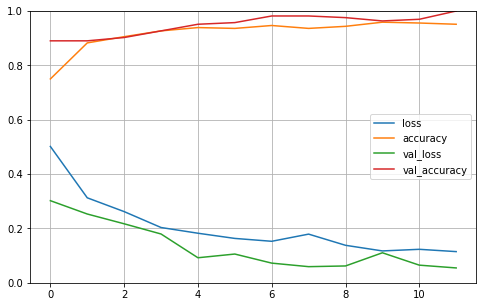

Epoch  26 : early stopping
Epoch  14 : early stopping
Epoch  19 : early stopping
Epoch  11 : early stopping
Epoch  7 : early stopping
Epoch  12 : early stopping
Epoch  7 : early stopping
Epoch  13 : early stopping
Epoch  19 : early stopping
Epoch  22 : early stopping
Epoch  19 : early stopping
Epoch  27 : early stopping
Epoch  9 : early stopping
Epoch  13 : early stopping
Epoch  9 : early stopping
Epoch  11 : early stopping
Epoch  7 : early stopping
Epoch  17 : early stopping
Epoch  16 : early stopping
Epoch  16 : early stopping
Epoch  16 : early stopping
Epoch  8 : early stopping
Epoch  9 : early stopping
Epoch  26 : early stopping
Epoch  11 : early stopping
Epoch  19 : early stopping
Epoch  7 : early stopping
Epoch  21 : early stopping
Epoch  7 : early stopping
Epoch  14 : early stopping
Epoch  11 : early stopping
Epoch  13 : early stopping
Epoch  18 : early stopping
Epoch  8 : early stopping
Epoch  17 : early stopping
Epoch  12 : early stopping
Epoch  11 : early stopping
Epoch  12 :

In [88]:
from sklearn import  metrics
models = []
for bs in batch_size_list:
  for lr in lr_list:
    for p in dropout_p:
      for activation in activation_list:
        model = keras.Sequential([             
            Dense(1024,input_shape=[X_train.shape[1]], kernel_initializer=initializer),
            BatchNormalization(),
            Activation(activation),
            Dropout(p),
            Dense(1024, kernel_initializer=initializer),
            BatchNormalization(),
            Activation(activation),
            Dropout(p),
            Dense(512, kernel_initializer=initializer),
            BatchNormalization(),
            Activation(activation),
            Dropout(p),
            Dense(256, kernel_initializer=initializer),
            BatchNormalization(),
            Activation(activation),
            Dropout(p),
            Dense(128, kernel_initializer=initializer),
            BatchNormalization(),
            Activation(activation),
            Dropout(p),
            Dense(64, activation=activation, kernel_initializer=initializer),
            Dense(1, activation='sigmoid', kernel_initializer=initializer),
        ])
        Adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
        model.compile(loss="binary_crossentropy", optimizer=Adam, metrics=["accuracy"])
        history = model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size=bs, epochs=150, callbacks=[early_stopping], verbose=0)
        y_pred = (model.predict(X_val)>0.5)
        if metrics.accuracy_score(y_val, y_pred) > 0.999:
          models.append((model, 'batch_size: '+ str(bs)+ 'lr: '+ str(lr)+ 'dropout p: '+str(p)+ 'activation: '+str(activation)))
          print('batch_size: ', bs, 'lr: ', lr, 'dropout p: ', p, 'activation: ',activation)
          print("precision_score: {}".format(metrics.precision_score(y_val, y_pred )))
          print("recall_score: {}".format( metrics.recall_score(y_val, y_pred )))
          print("f1_score: {}".format( metrics.f1_score(y_val, y_pred)))
          print("accuracy_score: {}".format( metrics.accuracy_score(y_val, y_pred)))
          pd.DataFrame(history.history).plot(figsize=(8, 5))
          plt.grid(True)
          plt.gca().set_ylim(0, 1)
          plt.show()
      
      

Epoch  13 : early stopping, val acc > 0.99
Epoch  13 : early stopping
batch_size:  16 lr:  0.0001  without dropout  activation:  relu
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


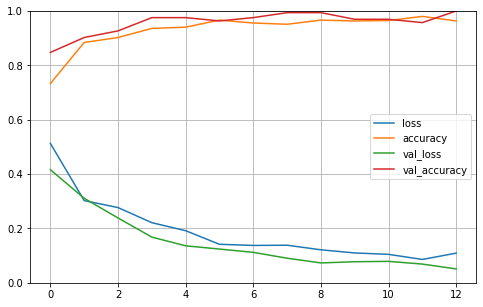

Epoch  21 : early stopping, val acc > 0.99
Epoch  21 : early stopping
batch_size:  16 lr:  0.0001  without dropout  activation:  elu
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


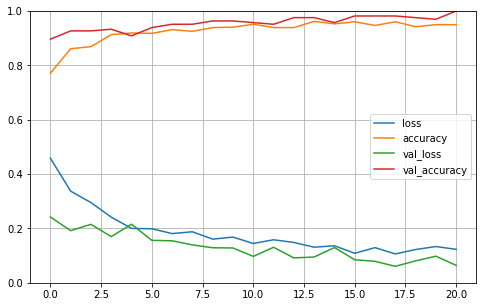

Epoch  11 : early stopping
Epoch  19 : early stopping
Epoch  16 : early stopping
Epoch  19 : early stopping
Epoch  25 : early stopping
Epoch  6 : early stopping
Epoch  7 : early stopping, val acc > 0.99
Epoch  7 : early stopping
batch_size:  32 lr:  0.0001  without dropout  activation:  relu
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


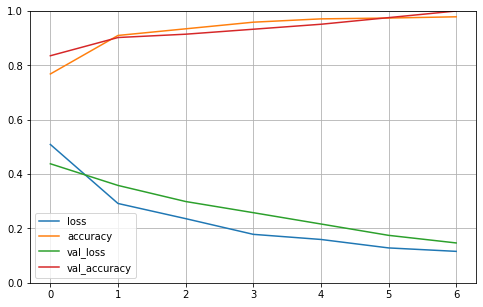

Epoch  12 : early stopping
Epoch  13 : early stopping
Epoch  10 : early stopping
Epoch  14 : early stopping
Epoch  11 : early stopping
Epoch  19 : early stopping
Epoch  12 : early stopping
Epoch  12 : early stopping, val acc > 0.99
Epoch  12 : early stopping
batch_size:  64 lr:  0.0001  without dropout  activation:  relu
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


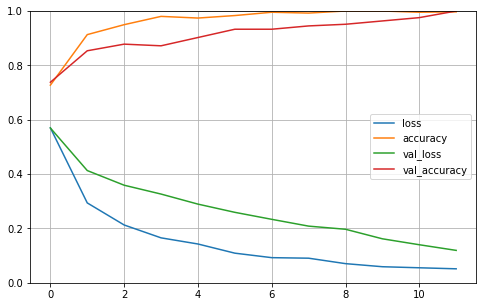

Epoch  19 : early stopping, val acc > 0.99
Epoch  19 : early stopping
batch_size:  64 lr:  0.0001  without dropout  activation:  elu
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


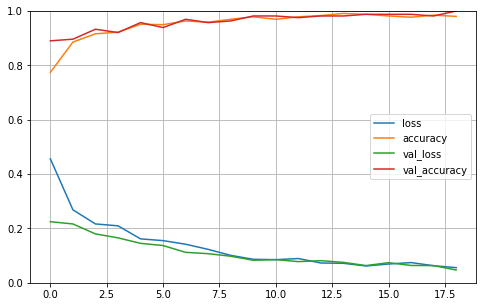

Epoch  17 : early stopping
Epoch  20 : early stopping
Epoch  9 : early stopping
Epoch  12 : early stopping
Epoch  6 : early stopping
Epoch  6 : early stopping


In [90]:
for bs in batch_size_list:
  for lr in lr_list:
      for activation in activation_list:
        model = keras.Sequential([             
            Dense(1024,input_shape=[X_train.shape[1]], kernel_initializer=initializer),
            BatchNormalization(),
            Activation(activation),
            Dense(1024, kernel_initializer=initializer),
            BatchNormalization(),
            Activation(activation),
            Dense(512, kernel_initializer=initializer),
            BatchNormalization(),
            Activation(activation),
            Dense(256, kernel_initializer=initializer),
            BatchNormalization(),
            Activation(activation),
            Dense(128, kernel_initializer=initializer),
            BatchNormalization(),
            Activation(activation),
            Dense(64, activation=activation, kernel_initializer=initializer),
            Dense(1, activation='sigmoid', kernel_initializer=initializer),
        ])
        Adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
        model.compile(loss="binary_crossentropy", optimizer=Adam, metrics=["accuracy"])
        history = model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size=bs, epochs=150, callbacks=[early_stopping], verbose=0)
        y_pred = (model.predict(X_val)>0.5)
        if metrics.accuracy_score(y_val, y_pred) > 0.999:
          models.append((model, 'batch_size: '+ str(bs)+ ' lr: '+ str(lr)+ ' without dropout '+ ' activation: '+str(activation)))
          print('batch_size: ', bs, 'lr: ', lr, ' without dropout ', 'activation: ',activation)
          print("precision_score: {}".format(metrics.precision_score(y_val, y_pred )))
          print("recall_score: {}".format( metrics.recall_score(y_val, y_pred )))
          print("f1_score: {}".format( metrics.f1_score(y_val, y_pred)))
          print("accuracy_score: {}".format( metrics.accuracy_score(y_val, y_pred)))
          pd.DataFrame(history.history).plot(figsize=(8, 5))
          plt.grid(True)
          plt.gca().set_ylim(0, 1)
          plt.show()

In [92]:
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for model, model_info in models:
    y_pred = (model.predict(X_test)>0.5)
    precision_score.append(metrics.precision_score(y_test, y_pred))
    recall_score.append(metrics.recall_score(y_test, y_pred))
    f1_score.append( metrics.f1_score(y_test, y_pred))
    accuracy_score.append(metrics.accuracy_score(y_test, y_pred))

res_labels = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
    }
res_df = pd.DataFrame(data=res_labels)
res_df.insert(loc=0, column='Model_id', value=[model_info[1] for model_info in models])
def highlight_max(s):
    is_large, is_max = s.nlargest(2).values, s.nlargest(1).values
    
    return ['color: lightgreen' if v in is_max else 'color: green' if v in is_large else '' for v in s]

res_df.style.apply(highlight_max, subset=['precision_score',	'recall_score',	'f1_score','accuracy_score'])

,Model_id,precision_score,recall_score,f1_score,accuracy_score
0,batch_size: 32lr: 0.0005dropout p: 0.1activation: relu,1.000000,0.990291,0.995122,0.995122
1,batch_size: 16 lr: 0.0001 without dropout activation: relu,0.980392,0.970874,0.975610,0.975610
2,batch_size: 16 lr: 0.0001 without dropout activation: relu,0.970874,0.970874,0.970874,0.970732
3,batch_size: 16 lr: 0.0001 without dropout activation: elu,0.990385,1.000000,0.995169,0.995122
4,batch_size: 32 lr: 0.0001 without dropout activation: relu,1.000000,0.970874,0.985222,0.985366
5,batch_size: 64 lr: 0.0001 without dropout activation: relu,0.989796,0.941748,0.965174,0.965854
6,batch_size: 64 lr: 0.0001 without dropout activation: elu,1.000000,0.970874,0.985222,0.985366


In [93]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 33.9 MB/s 


In [94]:
def predict_heart_disease_likelihood(model, data,patient_id, more_details = False):
    df = pd.DataFrame(data={'patient id': patient_id, 'likelihood of heart disease': list(map(lambda x: '{:,.2%}'.format(x), model.predict(data).flatten())),}).set_index('patient id')
    display(df)

def features_explanation(model, data_visualization):
    e = shap.KernelExplainer(model, shap.sample(X_train, 100))
    shap_values = e.shap_values(data_visualization)
    shap.initjs()
    shap.summary_plot(shap_values[0], data_visualization, feature_names=df.columns)


In [95]:
best_model = models[0][0]

True value  1


,likelihood of heart disease
patient id,
527,99.77%


  0%|          | 0/1 [00:00<?, ?it/s]

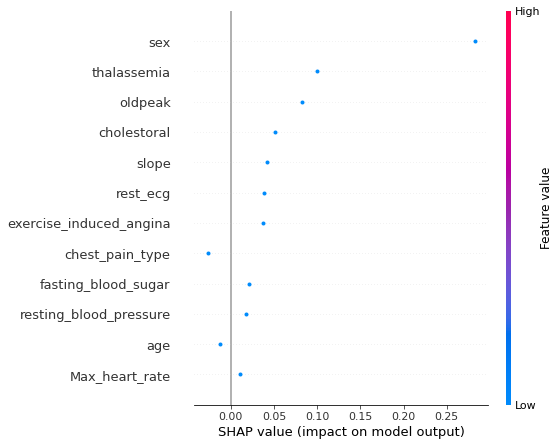

In [96]:
data_visualization = X_test[0].reshape(1, 12)
print('True value ',y_test.iloc[0])
predict_heart_disease_likelihood(best_model, data_visualization,y_test.index[0])
features_explanation(best_model, data_visualization)

True value  0


,likelihood of heart disease
patient id,
447,0.09%


  0%|          | 0/1 [00:00<?, ?it/s]

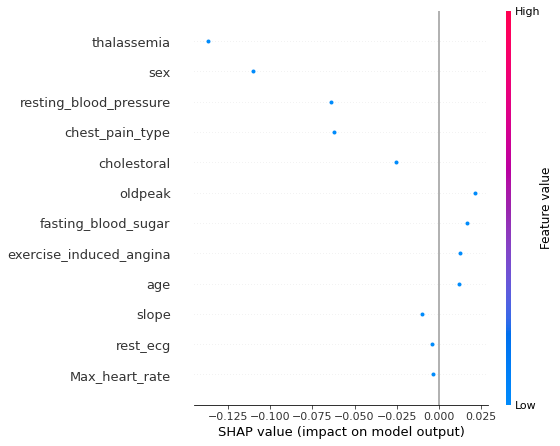

In [97]:
data_visualization = X_test[2].reshape(1, 12)
print('True value ',y_test.iloc[2])
predict_heart_disease_likelihood(best_model, data_visualization,y_test.index[2])
features_explanation(best_model, data_visualization)

  0%|          | 0/205 [00:00<?, ?it/s]

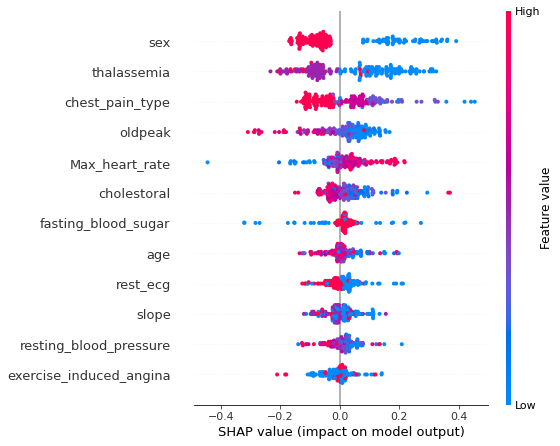

In [114]:
features_explanation(best_model, X_test)

  0%|          | 0/205 [00:00<?, ?it/s]

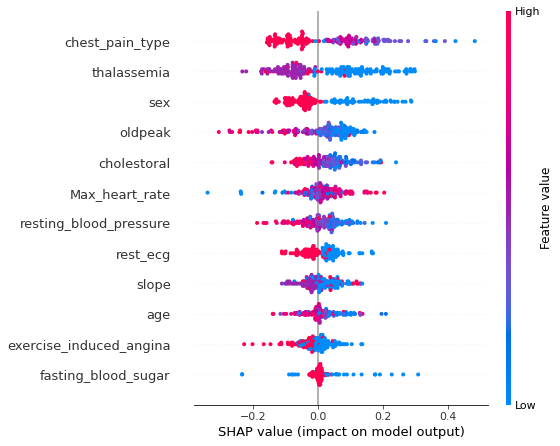

In [115]:
best_model_2 = models[3][0]
features_explanation(best_model_2, X_test)